In [1]:
%matplotlib inline
import numpy as np
from kolzur_filter import kz_filter, kzft, kzp, _kz_coeffs
import matplotlib.pyplot as plt

# Filter coefficients

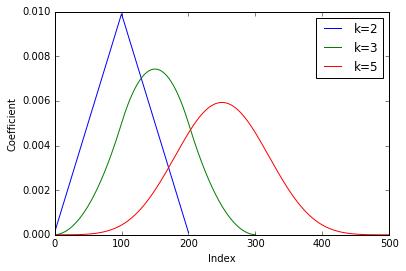

In [2]:
plt.plot(_kz_coeffs(101, 2), label='k=2')
plt.plot(_kz_coeffs(101, 3), label='k=3')
plt.plot(_kz_coeffs(101, 5), label='k=5')
plt.xlabel('Index')
plt.ylabel('Coefficient')
plt.legend()

# Smooth data

## Signal definition
Let us generate a signal which is the summation of two sine waves of frequency 0.05 Hz and 0.25 Hz and amplitude 1 and 0.1. The timerange is [0, 200] with a step of 0.1:

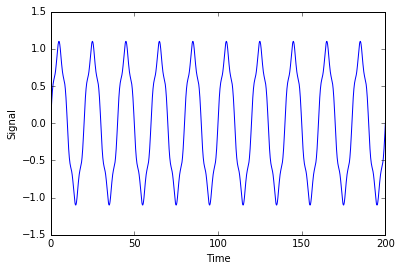

In [3]:
dt = 0.1
t = np.arange(0, 200+dt, dt)
x = np.sin(2*np.pi*0.05*t)+0.1*np.sin(2*np.pi*0.25*t)

plt.plot(t, x)
plt.xlabel('Time')
plt.ylabel('Signal')

## KZ filter
Now, let us apply the KZ filter on the data for different window sizes. Here, the window size is given in number of array points, not in time unit. The wider the window, the more the filter cuts high frequencies:

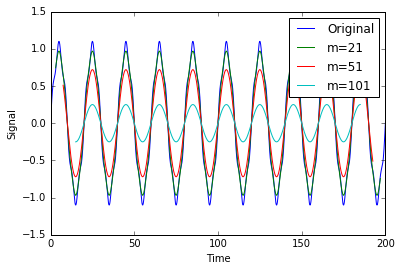

In [4]:
plt.plot(t, x, label='Original')

k = 3
for m in [21, 51, 101]:
    w = int(k*(m-1)/2)
    plt.plot(t[w:-w], kz_filter(x, m, k), label='m={}'.format(m))

plt.xlabel('Time')
plt.ylabel('Signal')
plt.legend()

## KZFT filter and signal reconstruction
By summing the KZFT filters calculated at the correct frequency, it is possible to reconstruct perfectly the signal. The filter window should be large enough though. Special care must be taken when the time step between two data points does not correspond to the time unit (i.e. $x_{i+1}-x_i = dt \neq 1$). For convenience, one can use the keyword argument `dt` of function `kzft()`.

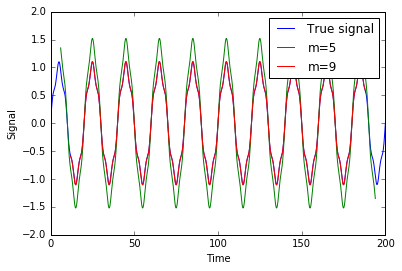

In [5]:
plt.plot(t, x, label='True signal')

k = 3
for m in [5, 9]:
    xkzftf = 2*np.real(np.sum(kzft(x, [0.05, 0.25], m, k, dt=dt), axis=0))
    w = int((t.size-xkzftf.size)/2)
    plt.plot(t[w:-w], xkzftf, label='m={}'.format(m))

plt.xlabel('Time')
plt.ylabel('Signal')
plt.legend()

## Perdiodogram
The periodogram yields the amplitude of dominant frequencies. The wider the filter window, the narrower the specturm. Again, `dt` keywordargument may be used for convenience:

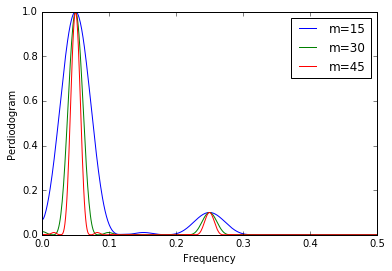

In [6]:
k = 3
nu = np.linspace(0., 0.5, num=500)
for m in [15, 30, 45]:
    plt.plot(nu, kzp(x, nu, m, k, dt=dt), label='m={}'.format(m))

plt.xlabel('Frequency')
plt.ylabel('Perdiodogram')
plt.xlim(0, 0.5)
plt.legend()

# Inperfect data
## Sparse data

Let us remove randomly 50% of the data to create a sparse signal:

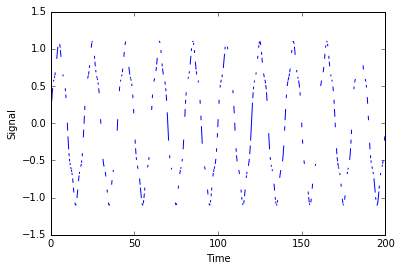

In [7]:
# Determine random points to remove
idx = np.random.permutation(t.size)[:int(t.size*0.5)]

xm = x.copy()
xm[idx] = np.nan

plt.plot(t, xm)
plt.xlabel('Time')
plt.ylabel('Signal')

The KZFT filter still shows a good correlation with the true signal. Yet, it was necessary to increase the window width:

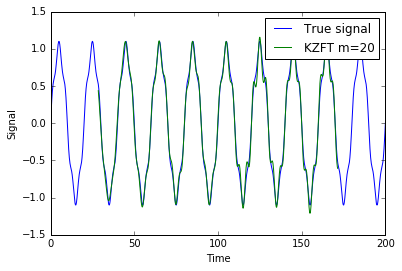

In [8]:
plt.plot(t, x, label='True signal')

k = 3
m = 20

xkzftf = 2*np.real(np.sum(kzft(xm, [0.05, 0.25], m, k, dt=dt), axis=0))
w = int((t.size-xkzftf.size)/2)
plt.plot(t[w:-w], xkzftf, label='KZFT m={}'.format(m))
plt.xlabel('Time')
plt.ylabel('Signal')
plt.legend()

On the other hand, the periodogram does not hilight anymore the 0.25 Hz dominent frequency as obviously as before, due to its low amplitude:

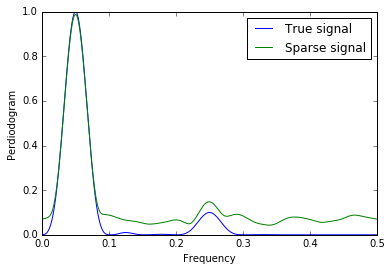

In [9]:
nu = np.linspace(0., 0.5, num=500)
plt.plot(nu, kzp(x, nu, m, k, dt=dt), label='True signal')
plt.plot(nu, kzp(xm, nu, m, k, dt=dt), label='Sparse signal')
plt.xlabel('Frequency')
plt.ylabel('Perdiodogram')
plt.xlim(0, 0.5)
plt.legend()

## Noisy data

Let us add some gaussian noise to the data:

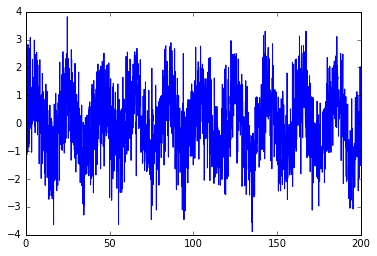

In [10]:
xn = x.copy()+np.random.normal(scale=1., size=t.size)
plt.plot(t, xn)

The KZFT filter still shows a good correlation with the true signal:

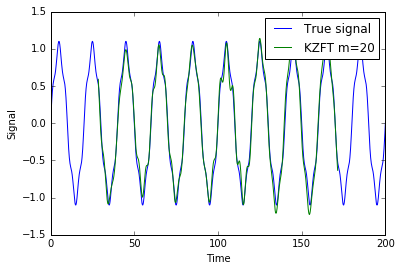

In [11]:
plt.plot(t, x, label='True signal')

k = 3
m = 20
xkzftf = 2*np.real(np.sum(kzft(xn, [0.05, 0.25], m, k, dt=dt), axis=0))
w = int((t.size-xkzftf.size)/2)
plt.plot(t[w:-w], xkzftf, label='KZFT m={}'.format(m))

plt.xlabel('Time')
plt.ylabel('Signal')
plt.legend()

Again, the 0.25 Hz frequency is not hilighted:

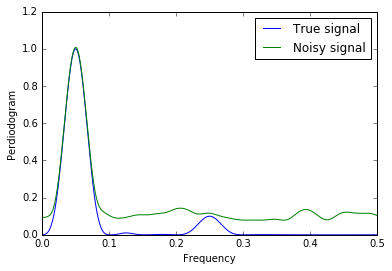

In [12]:
nu = np.linspace(0., 0.5, num=500)
plt.plot(nu, kzp(x, nu, m, k, dt=dt), label='True signal')
plt.plot(nu, kzp(xn, nu, m, k, dt=dt), label='Noisy signal')
plt.xlabel('Frequency')
plt.ylabel('Perdiodogram')
plt.xlim(0, 0.5)
plt.legend()

## Sparse and noisy signal
Let us now consider a signal both sparse and noisy:

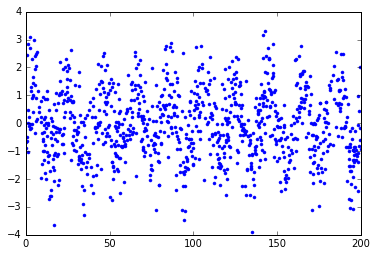

In [13]:
xnm = np.copy(xn)
xnm[idx] = np.nan
plt.plot(t, xnm, ls='', marker='.')

The KZFT filter correlation with the true signal deteriorates slightly:

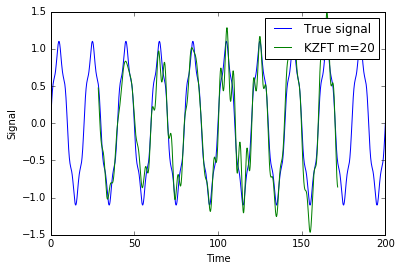

In [14]:
plt.plot(t, x, label='True signal')

k = 3
m = 20
xkzftf = 2*np.real(np.sum(kzft(xnm, [0.05, 0.25], m, k, dt=dt), axis=0))
w = int((t.size-xkzftf.size)/2)
plt.plot(t[w:-w], xkzftf, label='KZFT m={}'.format(m))

plt.xlabel('Time')
plt.ylabel('Signal')
plt.legend()

Again, the 0.25 Hz frequency is lost in the noise:

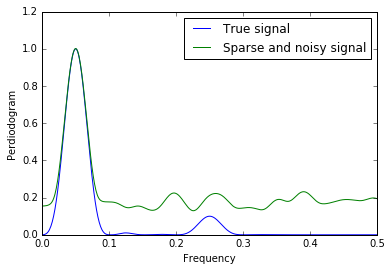

In [15]:
nu = np.linspace(0., 0.5, num=500)
plt.plot(nu, kzp(x, nu, m, k, dt=dt), label='True signal')
plt.plot(nu, kzp(xnm, nu, m, k, dt=dt), label='Sparse and noisy signal')
plt.xlabel('Frequency')
plt.ylabel('Perdiodogram')
plt.xlim(0, 0.5)
plt.legend()